In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import os

import bwsketchnet as sn
from data_layer import DataLayer, load_pretrained_model

FLAGS = {}
FLAGS['data_path'] = 'dataset/dataset_with_order_info_256.mat'
FLAGS['model_path'] = 'dataset/model_with_order_info_256.mat'
FLAGS['batch_size'] = 2
FLAGS['logdir'] = 'models/bwn-model/'
# Instantiate the data layer to have easy access of the dataset
dataset = DataLayer(FLAGS['data_path'], batch_size=FLAGS['batch_size'])
dataset.train_cursor = 5364
# Load the pretrained models
pretrained = load_pretrained_model(FLAGS['model_path'] if FLAGS['model_path'] else None)

/Users/ayush/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the dataset...
Dataset loaded!
Pretrained Model Loaded!


In [2]:
def visualize(activation, r, c):
    """Gets a numpy array of shape from the relu layer and it visualizes it.
    """
    N, W, H, F = activation.shape   
    fig = plt.figure(figsize=(c, r))
    for f in range(F):
        act_f = activation[0, :, :, f]
        max_val = np.max(act_f)
        if max_val > 255.0:
            act_f /= max_val
        sub4 = plt.subplot(r, c, f + 1)
        sub4.imshow(act_f, cmap='gray')
        sub4.set_xticks(())
        sub4.set_yticks(())

    fig.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
    plt.show()

In [3]:
with tf.Graph().as_default():
    images_placeholder = tf.placeholder(tf.float32, name='images_pl')
    labels_placeholder = tf.placeholder(tf.float32, name='labels_pl')
    dr_placeholder = tf.placeholder_with_default(1.0, shape=(), name='dr_pl')
    
    logits, activations = sn.inference(images_placeholder, dr_placeholder, pretrained=pretrained, visualize=True)
    init = tf.global_variables_initializer()
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        print os.path.join(FLAGS['logdir'], 'ckpt')
        latest_ckpt_file = tf.train.latest_checkpoint(os.path.join(FLAGS['logdir'], 'ckpt'))
        saver.restore(sess, latest_ckpt_file)
        
        images, _ = dataset.next_batch_train()
        ops = [logits]
        for layer in sorted(activations):
            ops.append(activations[layer])
        rets = sess.run(ops, feed_dict={ images_placeholder: images })

models/bwn-model/ckpt


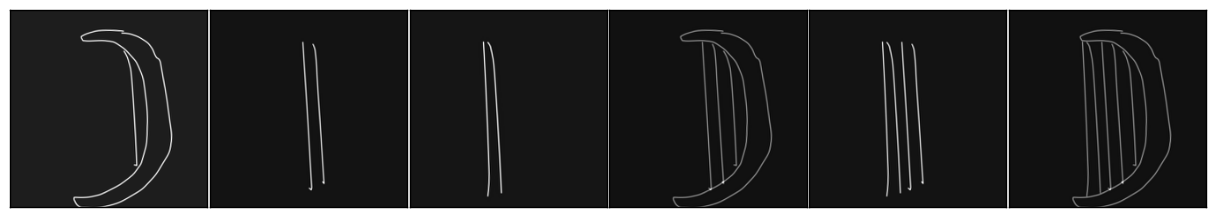

In [4]:
fig = plt.figure(figsize=(12, 2))
for i in range(6):
    sub4 = plt.subplot(1, 6, i + 1)
    sub4.imshow(images[0, :, :, i], cmap='gray')
    sub4.set_xticks(())
    sub4.set_yticks(())

fig.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()

In [5]:
np.argmax(rets[0][0])

99

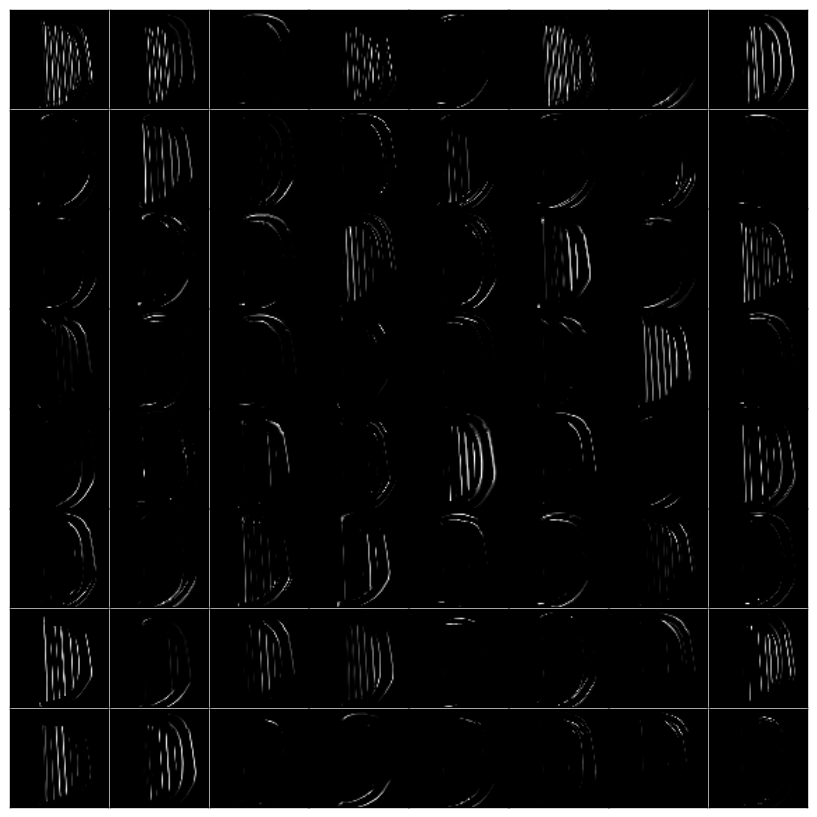

In [6]:
visualize(rets[1], 8, 8)

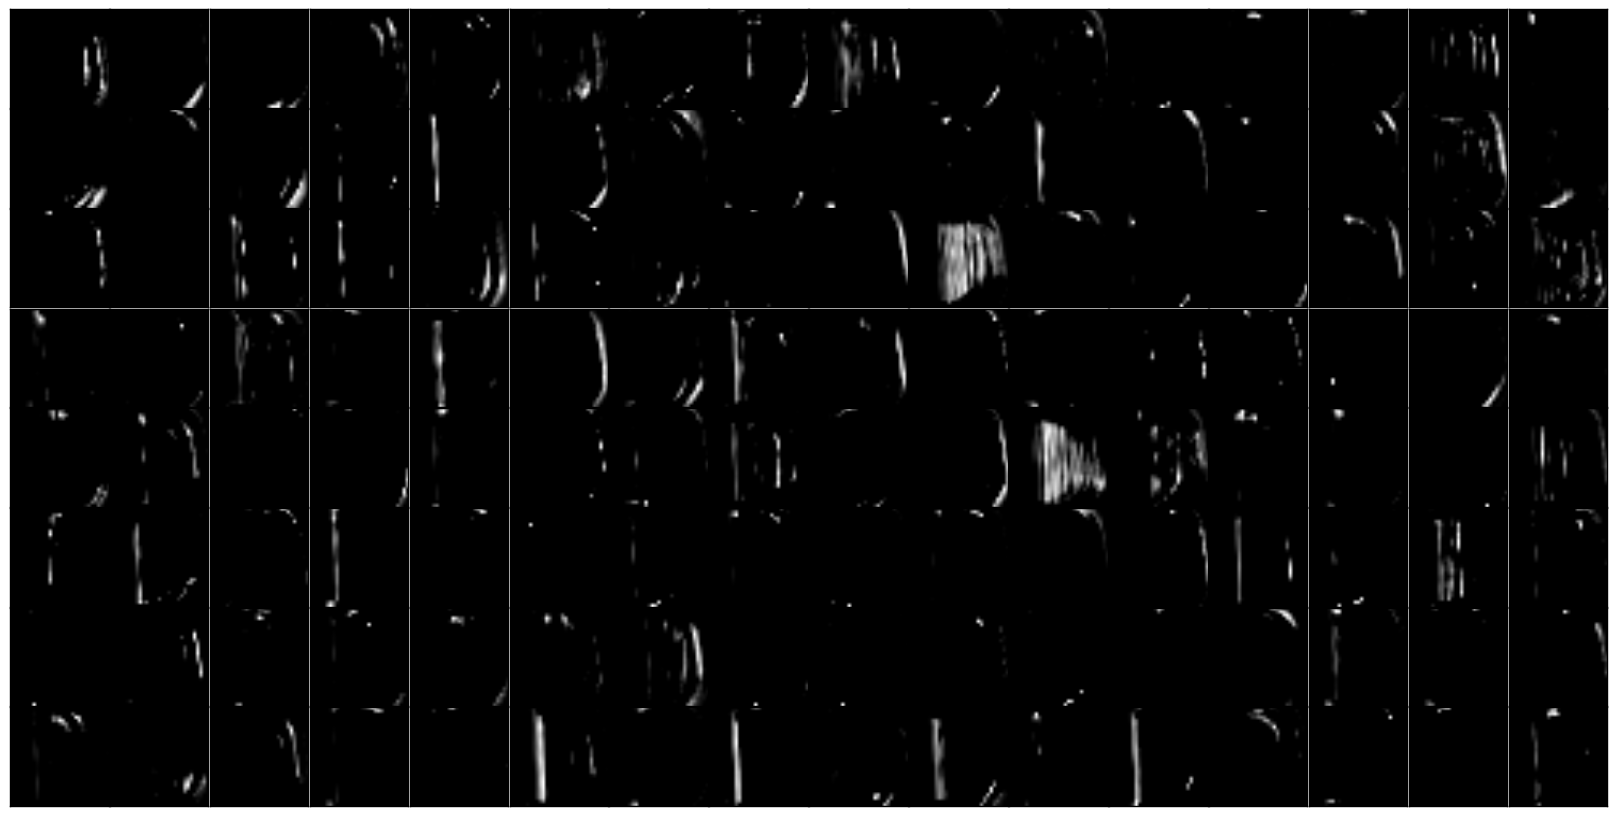

In [7]:
visualize(rets[2], 8, 16)

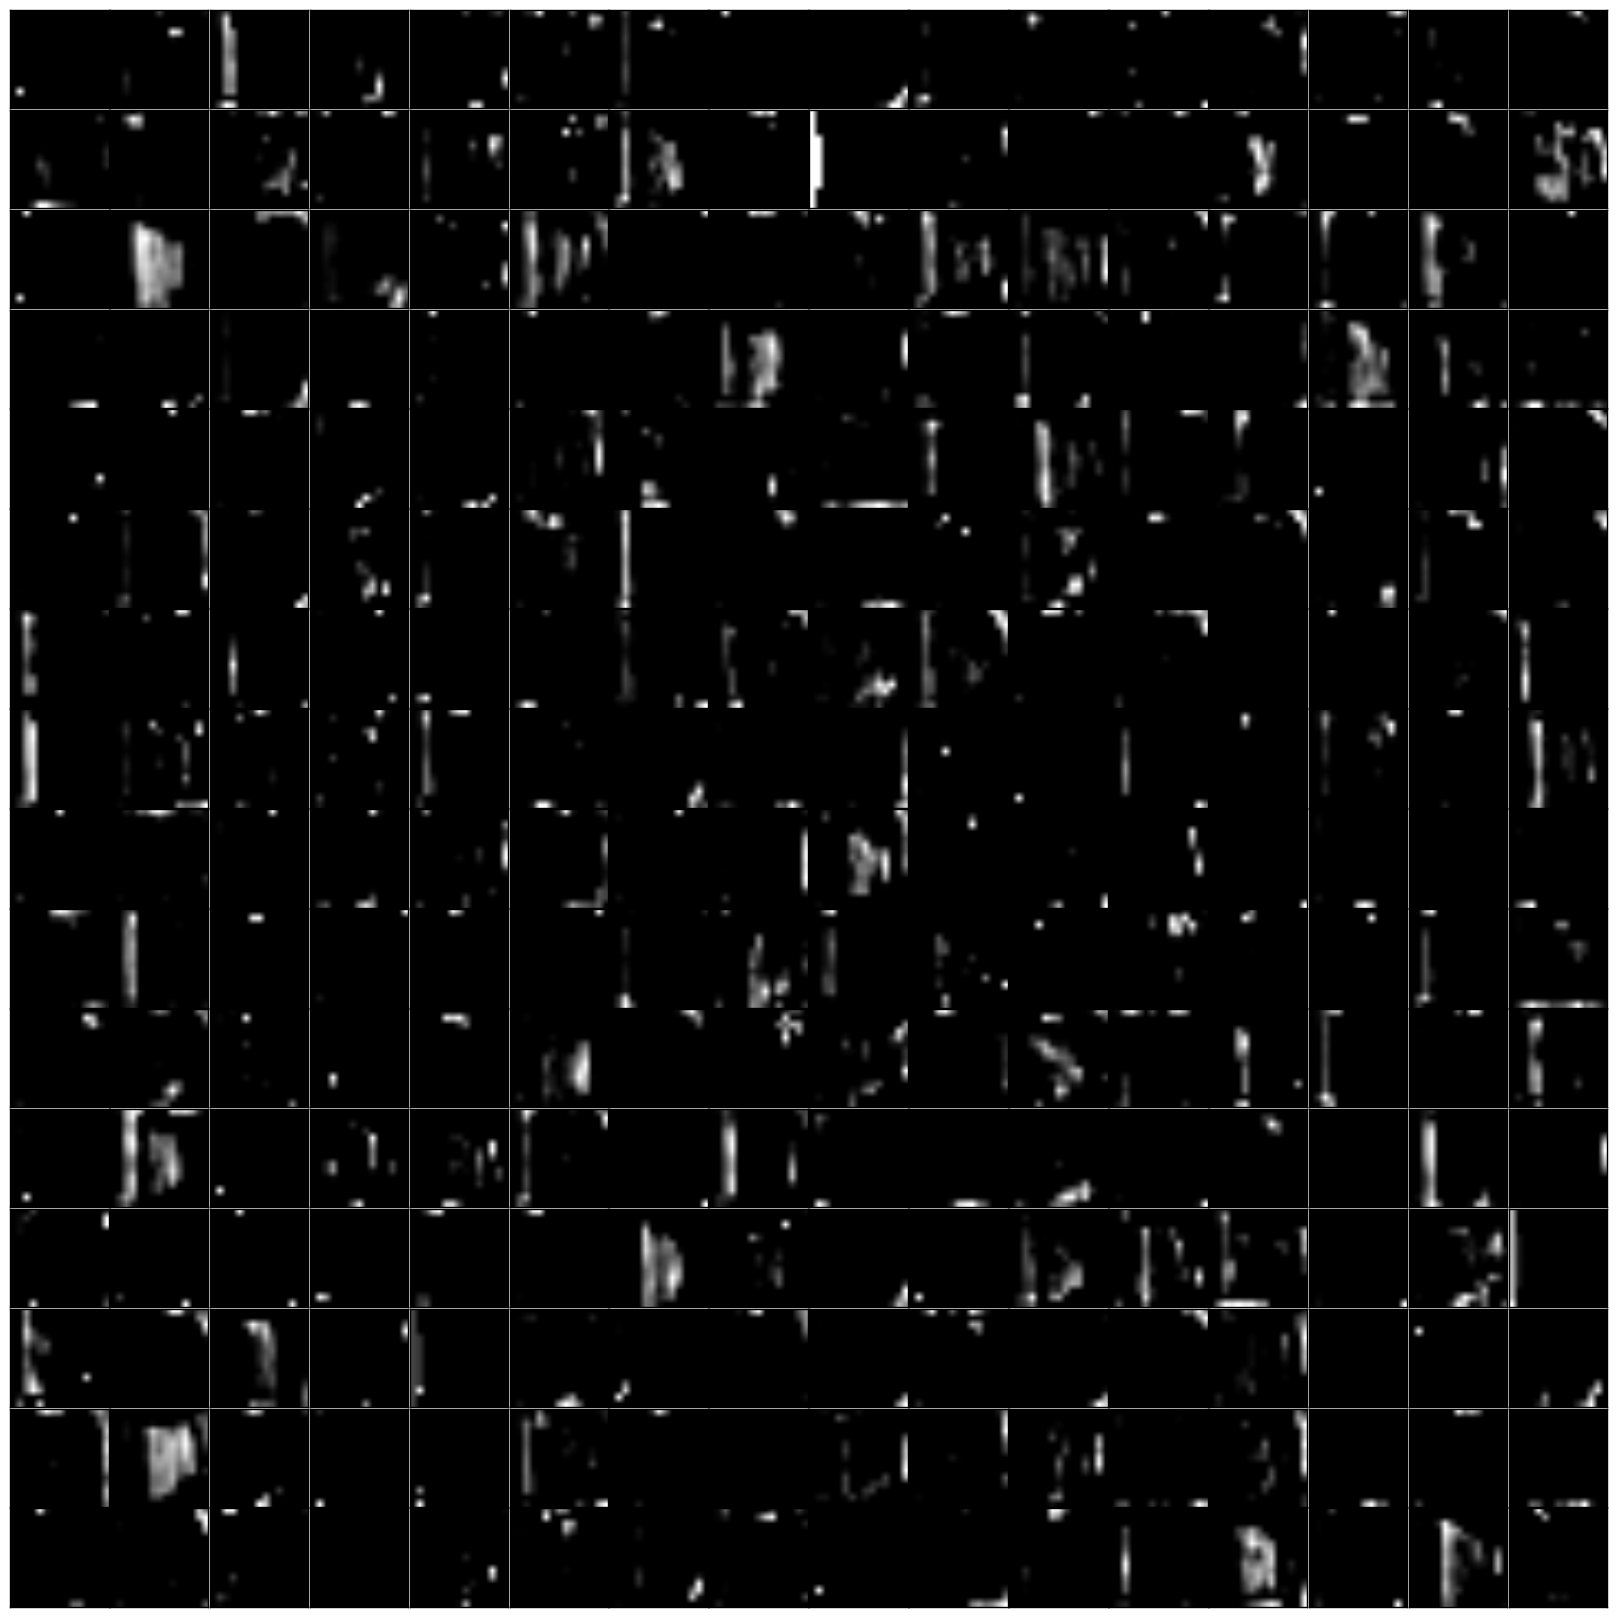

In [8]:
visualize(rets[3], 16, 16)

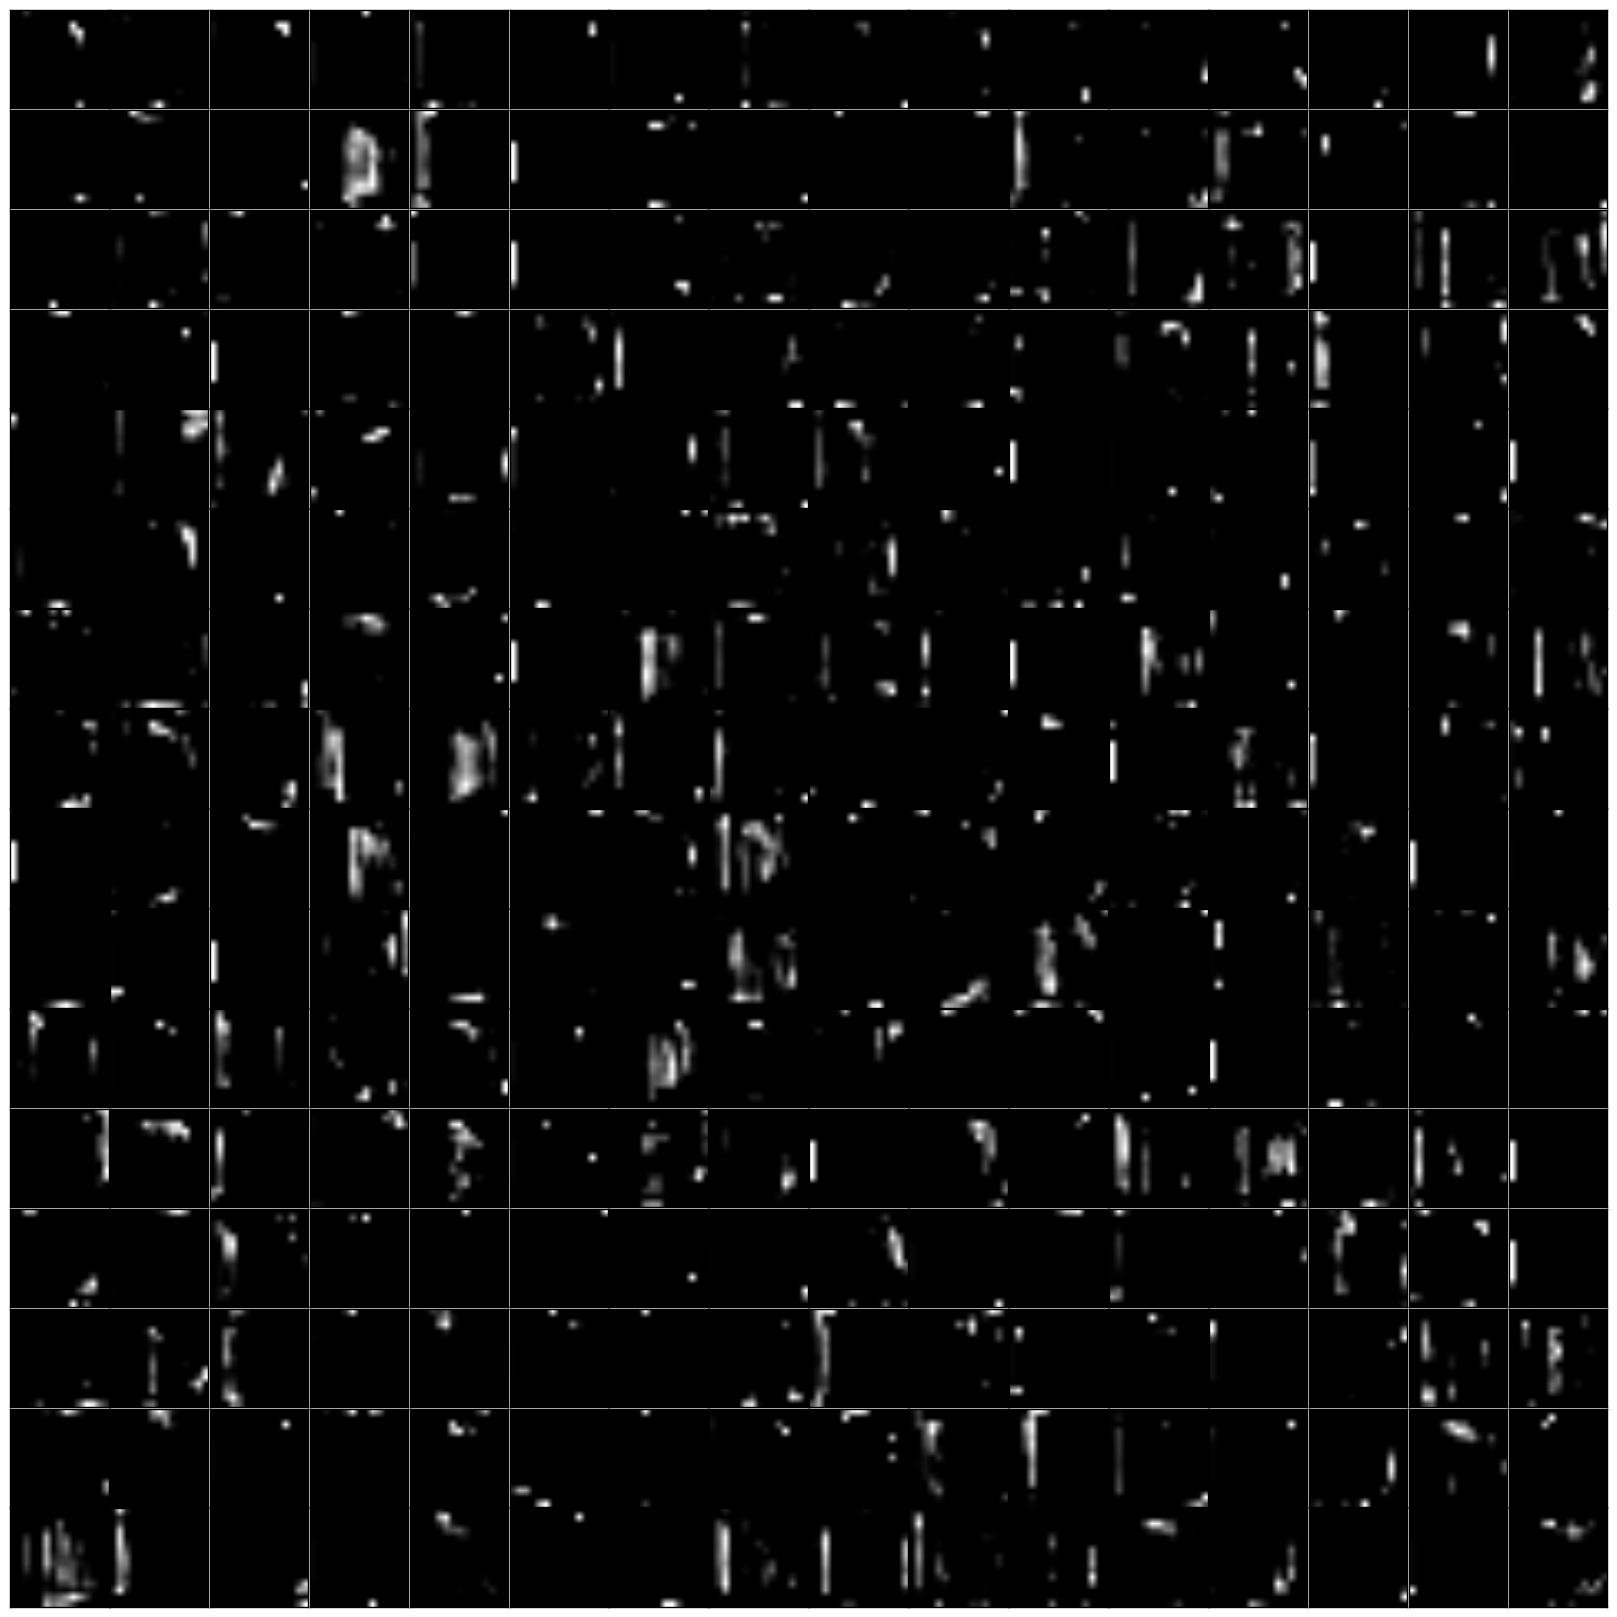

In [9]:
visualize(rets[4], 16, 16)

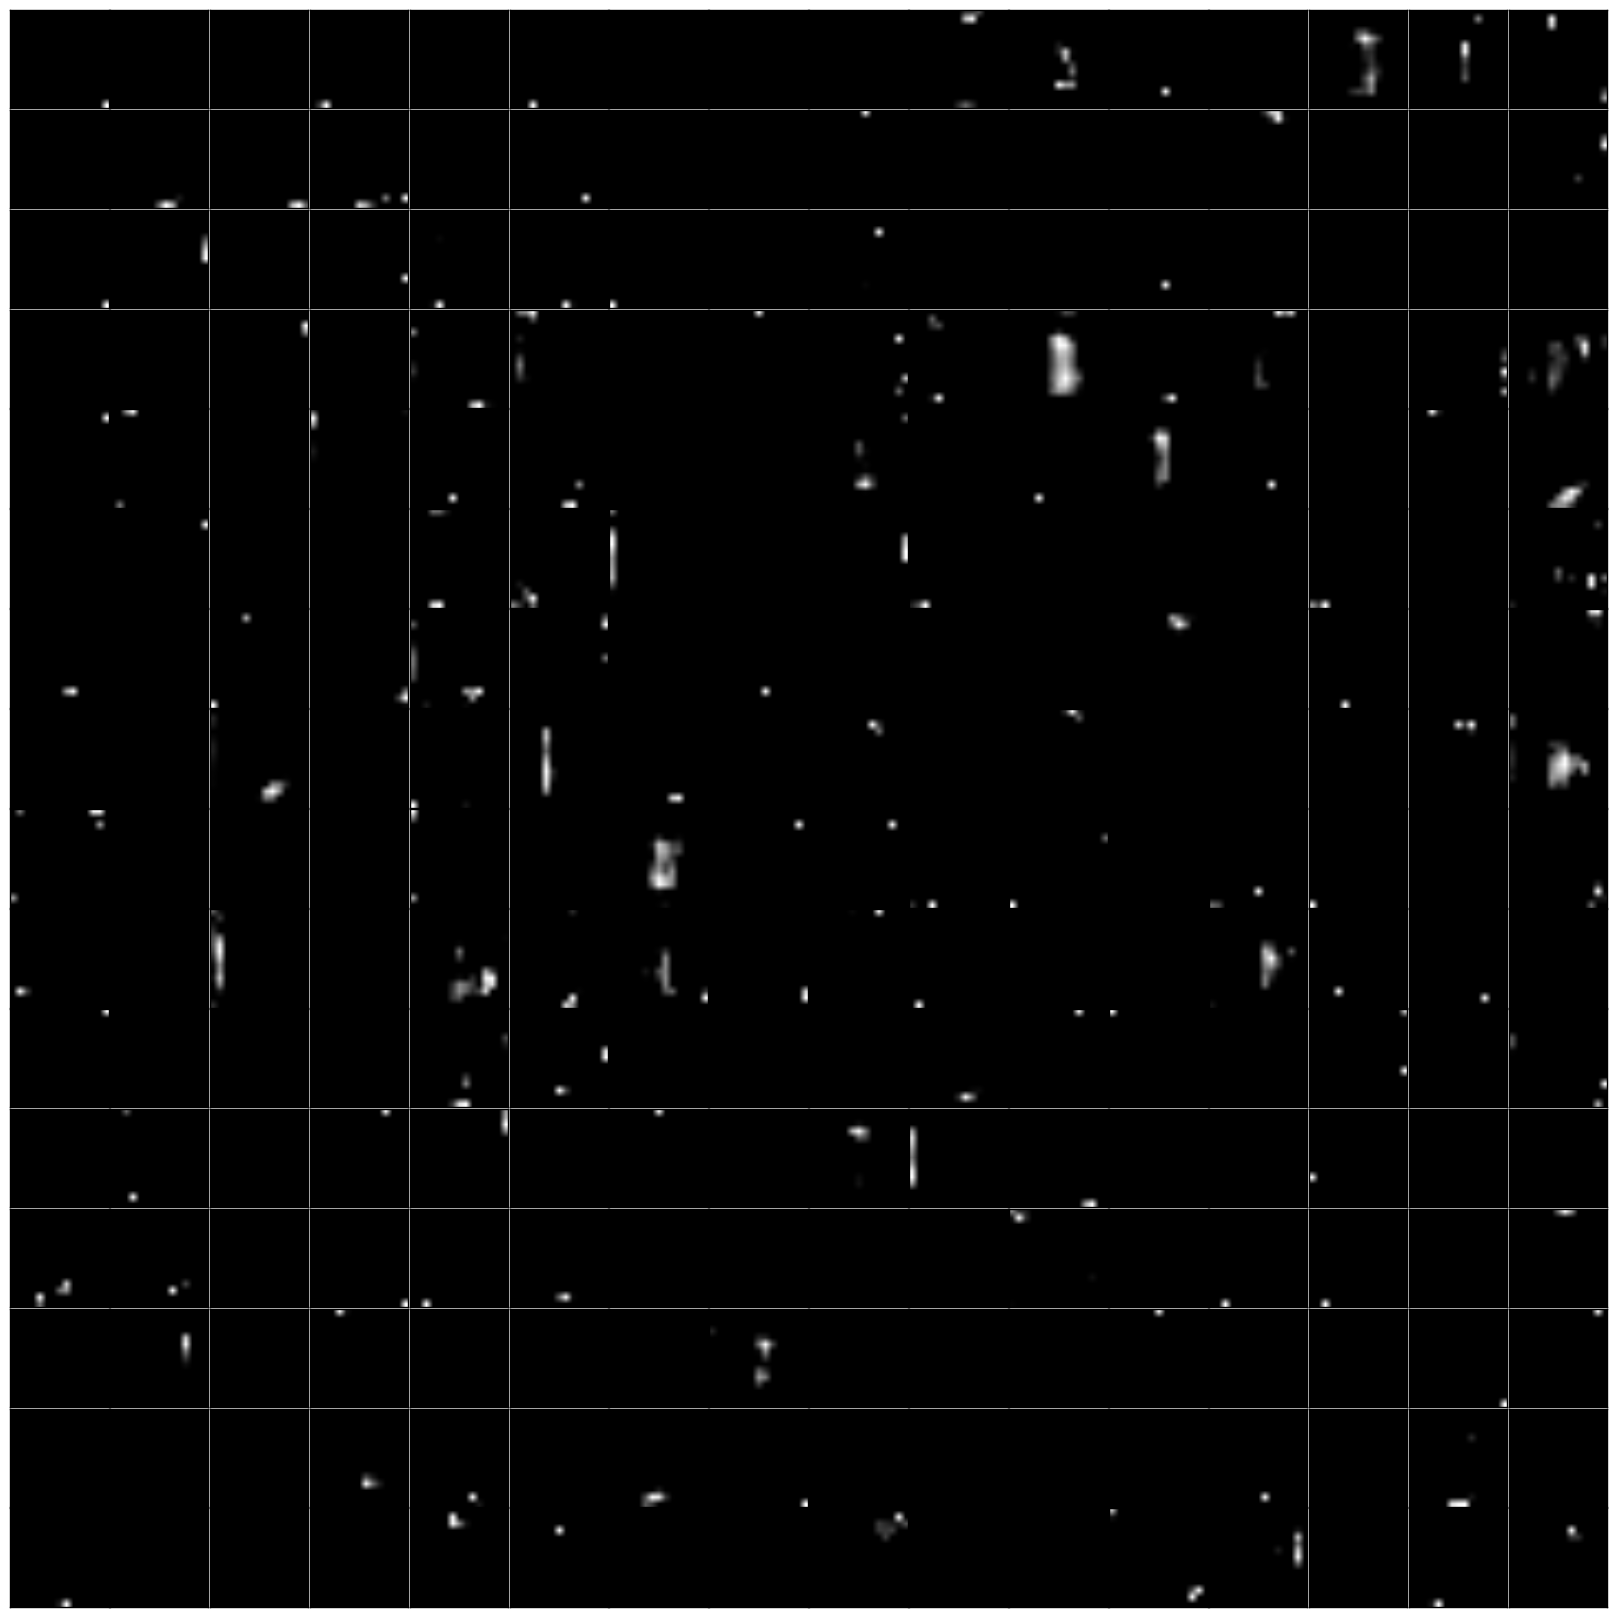

In [10]:
visualize(rets[5], 16, 16)

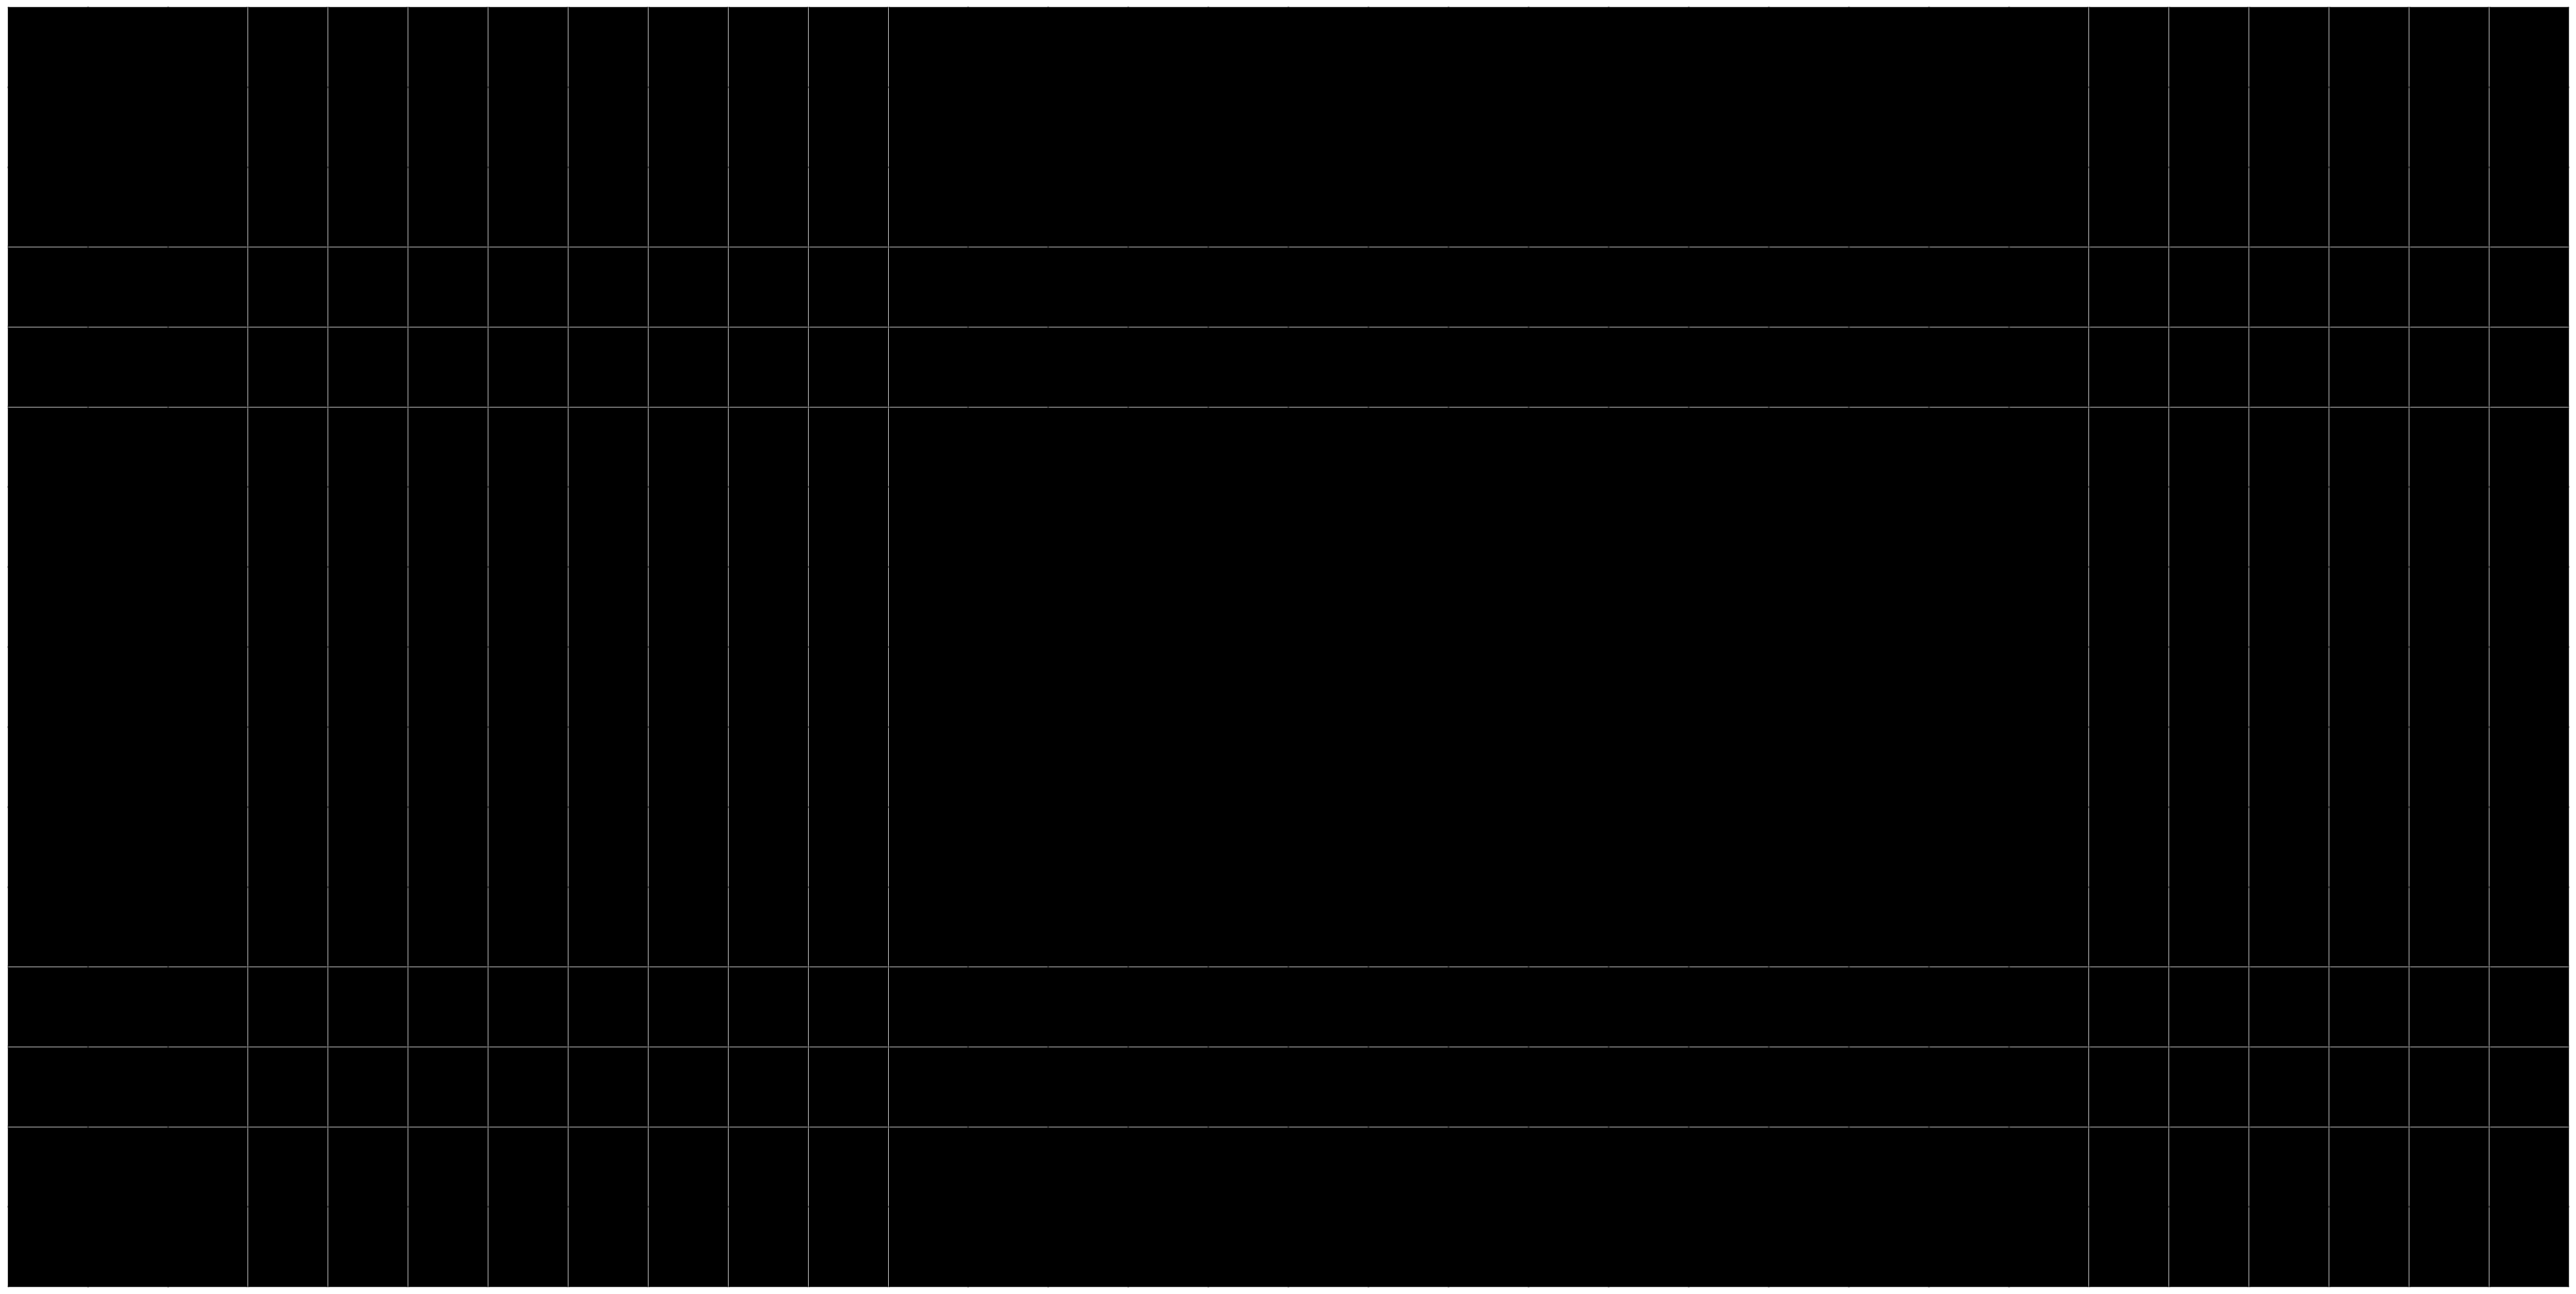

In [11]:
visualize(rets[6], 16, 32)

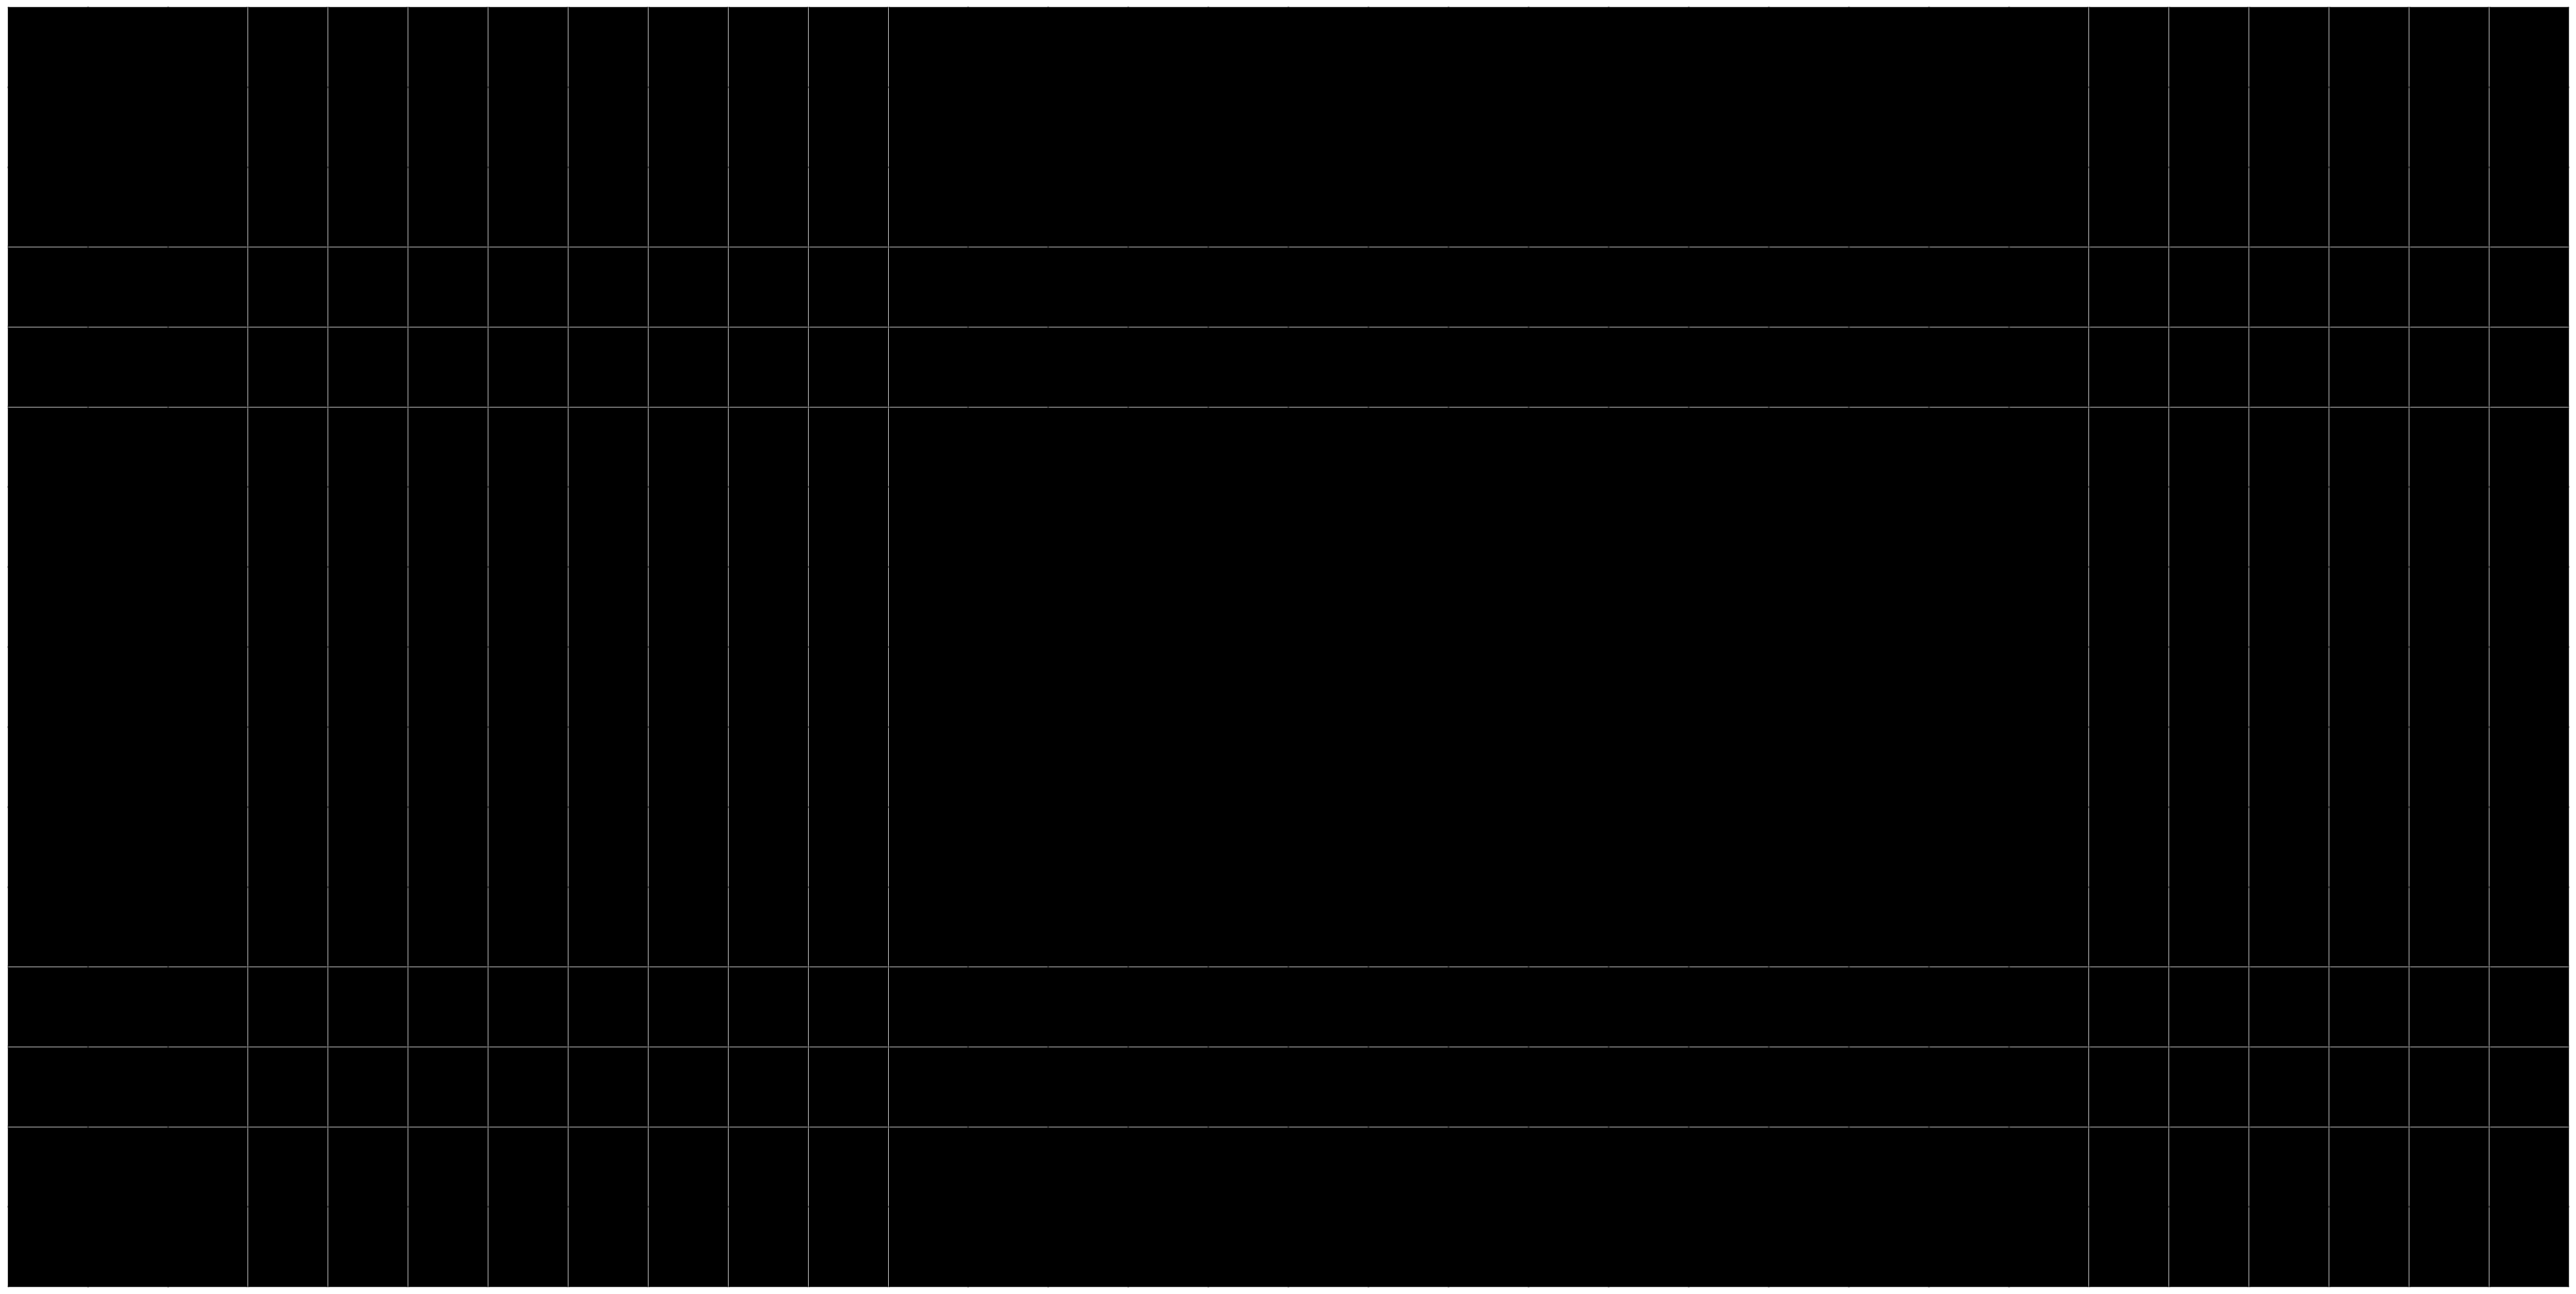

In [12]:
visualize(rets[7], 16, 32)